<h3>Challenge Test Accuracy : 77.99%</h3>

<h2>Importing Libraries and datasets</h2>

In [186]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r
#set pandas warning off
pd.set_option('mode.chained_assignment', None)

In [187]:
#function to generate random colors
def randomColor(n):
    color = []
    colorArr = ['00','11','22','33','44','55','66','77','88','99','AA','BB','CC','DD','EE','FF']
    for _ in range(n):
        color.append('#' + colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)])
    return color

In [188]:
#get datasets
traindf = pd.read_csv('/kaggle/input/titanic/train.csv')
display(traindf.head())
print(traindf.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


In [189]:
print(traindf.info())
display(traindf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
testdf = pd.read_csv('/kaggle/input/titanic/test.csv')
display(testdf.head())
print(testdf.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)


<h2>Exploratory Data Analysis</h2>

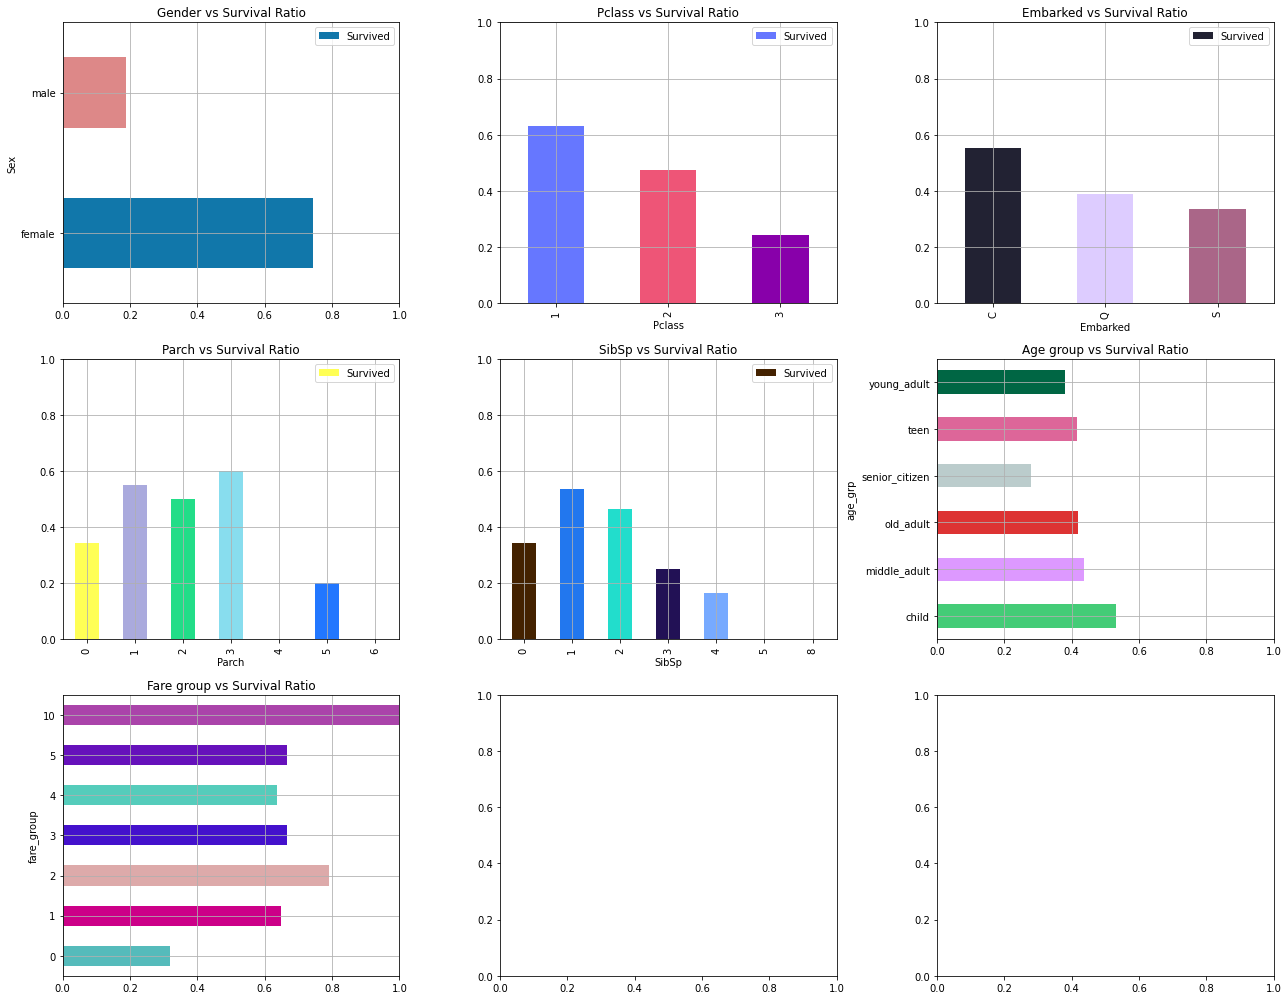

In [203]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (18,14))

#Gender vs Survuval Ratio
gender_survived = traindf[['Sex', 'Survived']].groupby('Sex').mean()
gender_survived.plot(kind='barh', 
                     color = [randomColor(len(gender_survived))], 
                     ax = axes[0,0],
                     title = 'Gender vs Survival Ratio',
                     xlim = (0,1),
                     grid = True,)

#Pclass vs Survival Ratio
pclass_survived = traindf[['Pclass', 'Survived']].groupby('Pclass').mean()
pclass_survived.plot(kind='bar', 
                     color = [randomColor(len(pclass_survived))], 
                     ax=axes[0,1],
                     title = 'Pclass vs Survival Ratio',
                     ylim = (0,1),
                     grid = True,)

#Embarked vs Survival Ratio
embarked_survived = traindf[['Embarked', 'Survived']].groupby('Embarked').mean()
embarked_survived.plot(kind='bar', 
                       color = [randomColor(len(embarked_survived))], 
                       ax=axes[0,2],
                       title = 'Embarked vs Survival Ratio',
                       ylim = (0,1),
                       grid = True,)

#Parch vs Survival Ratio
parch_survived = traindf[['Parch', 'Survived']].groupby('Parch').mean()
parch_survived.plot(kind='bar', 
                    color = [randomColor(len(parch_survived))], 
                    ax=axes[1,0], 
                    title = 'Parch vs Survival Ratio',
                    ylim = (0,1),
                    grid = True,)

#SibSp vs Survival Ratio
sibsp_survived = traindf[['SibSp', 'Survived']].groupby('SibSp').mean()
sibsp_survived.plot(kind='bar', 
                    color = [randomColor(len(sibsp_survived))], 
                    ax=axes[1,1],
                    title = 'SibSp vs Survival Ratio',
                    ylim = (0,1),
                    grid = True,)

#Age Group (without missing values) vs Survival Ratio
agegrp = {'child':(0,13), 'teen':(13,20), 'young_adult':(20,35), 'middle_adult':(35,45), 'old_adult':(45,60), 'senior_citizen':(60,100)}
age_survival = traindf[['Age','Survived']].dropna().reset_index(drop=True)
age_survival['age_grp'] = None

for i in range(len(age_survival)):
    for grp in agegrp:
        temp = agegrp[grp]
        if age_survival.loc[i,'Age'] in range(temp[0],temp[1]):
            age_survival.loc[i,'age_grp'] = grp
            break
            
age_survivalgrouped = age_survival.drop(columns=['Age']).groupby('age_grp').mean()

age_survivalgrouped.plot(kind= 'barh', 
                         color = [randomColor(6)], 
                         legend=False, ax=axes[1,2],
                         title = 'Age group vs Survival Ratio',
                         xlim = (0,1),
                         grid = True,)

#Fare (without missing values) vs survival Ratio
faregrp = [(i,50*i,50*(i+1)) for i in range(20)]
fare_survival = traindf[['Fare','Survived']].dropna().reset_index(drop=True)
fare_survival['fare_group'] = None

for i in range(len(fare_survival)):
    for grp in faregrp:
        if fare_survival.loc[i,'Fare'] >= grp[1] and fare_survival.loc[i,'Fare'] < grp[2]:
            fare_survival.loc[i,'fare_group'] = grp[0]
            break

fare_survivalgrouped = fare_survival.drop(columns=['Fare']).groupby('fare_group').mean()

fare_survivalgrouped.plot(kind= 'barh',
                          color = [randomColor(len(fare_survival))],
                          legend = False, ax=axes[2,0],
                          title = 'Fare group vs Survival Ratio',
                          xlim = (0,1),
                          grid = True,)

fig.tight_layout()
fig.show()

<h3>Inferences from the graph plots :</h3>
<ul>
    <li>Gender is the most important factor in determining survival rate</li>
    <li>Passengers with lower Pclass had higher chance of survival</li>
    <li>Passengers with 'C' Embarked had higher chance of survival</li>
    <li>Parch doesnot have a uniform survival ratio still, chance of survival of parch '5' was least</li>
    <li>SibSp '1' had highest chance of survival</li>
    <li>The survival rate of children is higher than others</li>
    <li>Except for children all age groups have similar survival ratio</li>
    <li>All people belonging to the highest fare tier survived</li>
    <li>The people belonging to the lowest fare tier has least chance of survival</li>
    <li>Cabin and ticket No are irrelevant fields for prediction</li>
</ul>
<br>

<h2>Preprocessing</h2>

In [192]:
#managing missing values
traindf2 = traindf[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
missingdf = traindf2.transpose()
missingdf['missing values'] = missingdf.apply(lambda x: len(traindf)-x.count(), axis=1)
missingdf = missingdf[['missing values']]
missingdf

,missing values
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Embarked,2


In [193]:
traindf2.drop(columns=['Age'], inplace=True)
traindf2['Embarked'].fillna(traindf2['Embarked'].mode()[0], inplace=True)
display(traindf2.head())

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [194]:
#selecting features
y = traindf2["Survived"]

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
X = pd.concat([pd.get_dummies(traindf2[features[0]]),pd.get_dummies(traindf2[features[1:]])], axis = 1, sort = False)
display(X.head())
print(X.shape)

,1,2,3,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0,0
2,0,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1


(891, 10)


In [195]:
#importing ML packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

<h2>Using GridSearchCV with DecisionTreeClassifier</h2>
<h4>I had used all models in another notebook and found Decision Tree to be the best one</h4>

In [196]:
#creating model
params_dict = {'criterion':['gini','entropy'], 
               'splitter':['random'], 
               'max_depth':[3,4,5,6,7,8]}

model = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=params_dict,
                     scoring='accuracy', 
                     cv=6, 
                     verbose = 0, 
                     refit=True)

hist = model.fit(X,y)
print('Best Parameters : ',model.best_params_)
print('Best Score : ', model.best_score_)

resdf = pd.DataFrame(model.cv_results_).drop(columns=['params','mean_fit_time','std_fit_time','mean_score_time','std_score_time'])
display(resdf)

Best Parameters :  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
Best Score :  0.8102817582683355


,param_criterion,param_max_depth,param_splitter,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,gini,3,random,0.805369,0.805369,0.859060,0.797297,0.790541,0.804054,0.810282,0.022453,1
1,gini,4,random,0.765101,0.798658,0.859060,0.783784,0.770270,0.804054,0.796821,0.031119,8
2,gini,5,random,0.791946,0.805369,0.825503,0.783784,0.777027,0.824324,0.801326,0.018779,3
3,gini,6,random,0.765101,0.791946,0.832215,0.783784,0.777027,0.810811,0.793481,0.022261,11
4,gini,7,random,0.771812,0.771812,0.838926,0.810811,0.797297,0.777027,0.794614,0.024434,9
5,gini,8,random,0.751678,0.798658,0.859060,0.804054,0.783784,0.790541,0.797962,0.032065,7
6,entropy,3,random,0.765101,0.805369,0.859060,0.797297,0.797297,0.804054,0.804696,0.027790,2
7,entropy,4,random,0.765101,0.798658,0.852349,0.770270,0.797297,0.810811,0.799081,0.028761,6
8,entropy,5,random,0.724832,0.812081,0.852349,0.783784,0.790541,0.804054,0.794607,0.038146,10
9,entropy,6,random,0.751678,0.805369,0.852349,0.804054,0.783784,0.797297,0.799089,0.029961,5


In [198]:
print('Missing Values in test data : ',len(testdf[features])-len(testdf[features].dropna()))

Missing Values in test data :  0


<h4>Our test features don't contain any missing values.</h4>

In [199]:
#transforming test dataset
Xfinaltest = pd.concat([pd.get_dummies(testdf[features[0]]),pd.get_dummies(testdf[features[1:]])], axis = 1, sort = False)
display(Xfinaltest.head())

,1,2,3,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,0,1
2,0,1,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,0,1
4,0,0,1,1,1,1,0,0,0,1


In [200]:
#make prediction on test dataset
Ypred = model.predict(Xfinaltest)

In [201]:
#save the results
resultdf = pd.DataFrame({'PassengerId': testdf['PassengerId'], 'Survived': Ypred})
display(resultdf.head())
resultdf.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved!")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Your submission was successfully saved!


<h3>Accuracy obtained in challenge : 77.99%</h3>